In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]

In [20]:
def print_stats(num, img):
    maxv = np.max(img)
    minv = np.min(img)
    print(f'Num: {num} Type: {img.dtype} Min: {minv} Max: {maxv}')

Num: 1 Type: uint16 Min: 172 Max: 8160


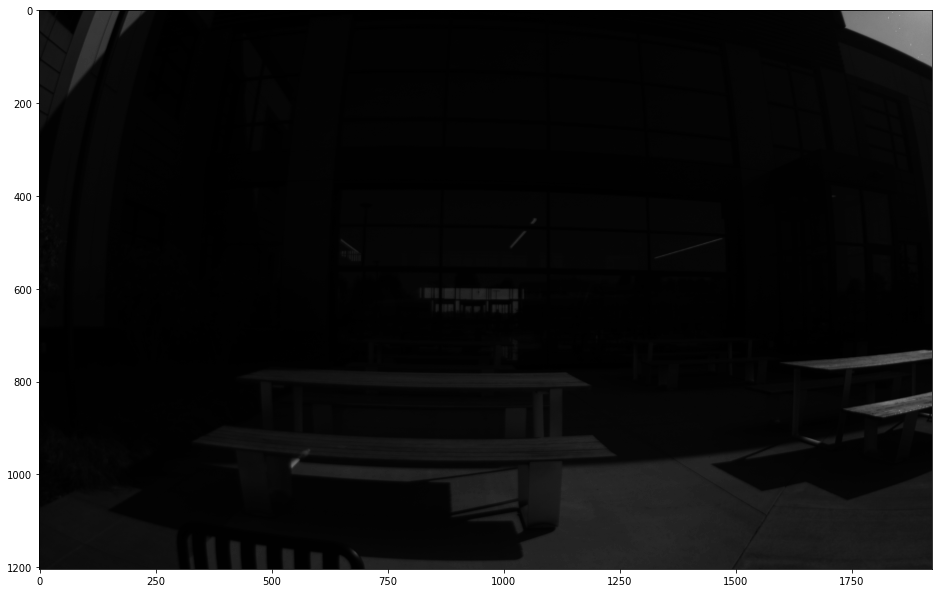

In [21]:
x = np.fromfile('cap_20bit_1924_1204_A.raw', 'uint32')
img = np.reshape(x, ((1204, 1924)))
img = img.astype('uint16')
print_stats(1, img)
#img = cv.imread('CaptureLinear.png', -1)
fimg = img.astype('float32') / np.max(img)
plt.imshow(fimg, cmap='gray')

Num: 1 Type: float32 Min: 5.022649765014648 Max: 5.65902853012085
Num: 2 Type: float32 Min: 0.025169137865304947 Max: 1.0
Num: 3 Type: float32 Min: 1.0270544290542603 Max: 1.6888689994812012
Num: 4 Type: float32 Min: 0.04847650229930878 Max: 1.0
K1: 5  K2: 1


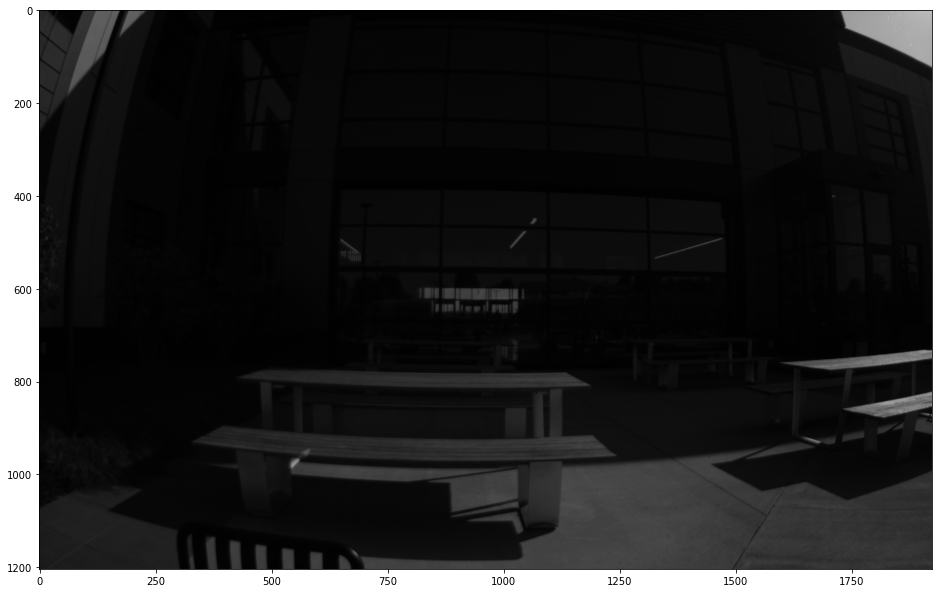

In [22]:
K1 = np.mean(fimg) / 2
K1 = 5
Hp = cv.GaussianBlur(fimg, (3,3), 3) + K1
print_stats(1, Hp)
Ibip = (1 + Hp) * (fimg) / (fimg + Hp)
print_stats(2, Ibip)

K2 = np.mean(Ibip) / 2
K2 = 1
As = cv.GaussianBlur(Ibip, (3,3), 1.5) + K2
print_stats(3, As)

Iga = (1 + As) * Ibip / (Ibip + As)
plt.imshow(Iga, cmap='gray')
print_stats(4, Iga)
print(f'K1: {K1}  K2: {K2}')
Iga = (Iga * 255).astype('uint8')

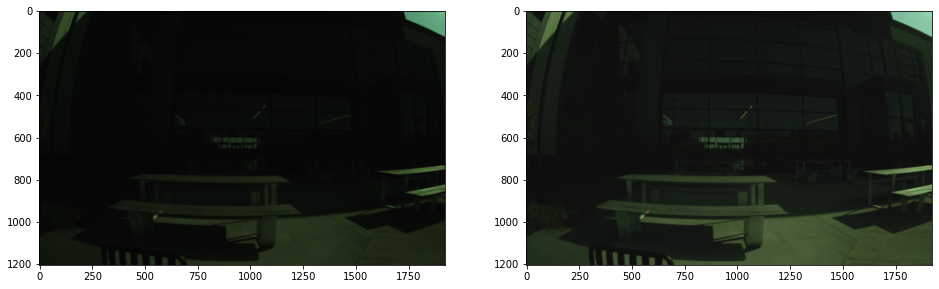

In [23]:

#cv.COLOR_BAYER_BG2BGR
#cv.COLOR_BAYER_GB2BGR
#cv.COLOR_BAYER_RG2BGR
#cv.COLOR_BAYER_GR2BGR
scale = 255 / np.max(img)
img_8 = (img * scale).astype('uint8')
rgb1 = cv.cvtColor(img_8, cv.COLOR_BAYER_GB2BGR)
rgb2 = cv.cvtColor(Iga, cv.COLOR_BAYER_GB2BGR)
#rgb1 = (rgb1 / 16).astype('uint8')

rgb1 = cv.cvtColor(rgb1, cv.COLOR_BGR2RGB)
rgb2 = cv.cvtColor(rgb2, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(rgb1)
ax[1].imshow(rgb2)

Num: 1 Type: uint16 Min: 860 Max: 13407
Num: 2 Type: float64 Min: 719.0415335463259 Max: 2760.5503935008887
Num: 3 Type: float64 Min: 137.56640625 Max: 3190.985595703125
Num: 5 Type: uint16 Min: 645 Max: 3162
Num: 6 Type: uint32 Min: 785 Max: 6204
Num: 7 Type: float64 Min: 713.9013906447535 Max: 2226.9212350346565
Num: 8 Type: uint8 Min: 18 Max: 254
K1f: 500  K2f: 500


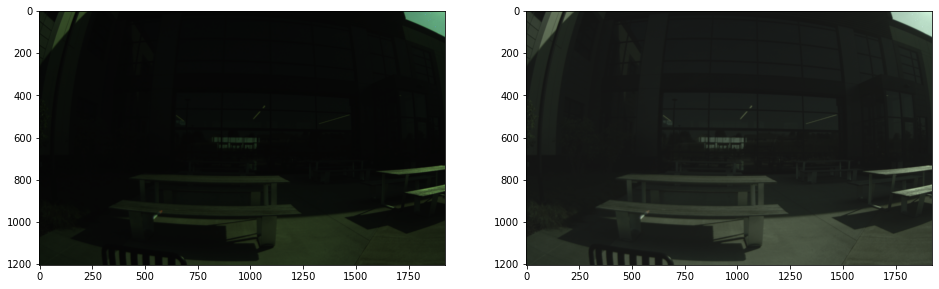

In [32]:
K1f = 500
K2f = 500
if K1f == -1:
    K1f = (np.mean(img) / 2).astype('uint16')
Hp = cv.GaussianBlur(img, (3,3), 3) + K1f
temp1 = img + Hp
print_stats(1, temp1)
temp2 = ((img.astype('uint32') * 4092) / temp1)
print_stats(2, temp2)
temp2 = temp2.astype('uint32')
temp2 += 1

Ibip = (Hp.astype('uint32') * temp2.astype('uint32')) / 4096
#Ibip = (Hp * ((img * 4092) / (img + Hp))) / 4092
print_stats(3, Ibip)
Ibip = Ibip.astype('uint16')
# Ibip = (Icfa(max) + H(p)) * (Icfa(p) / (Icfa(p) + H(p)))

#plt.imshow(Ibip, cmap='gray')

if K2f == -1:
    K2f = (np.mean(Ibip) / 2).astype('uint16')
As = cv.GaussianBlur(Ibip, (3,3), 1.5) + K2f
print_stats(5, As)

Ibip = Ibip.astype('uint32')
As = As.astype('uint32')
temp4 = Ibip + As
temp4 += 1
print_stats(6, temp4)
temp5 = (Ibip * 4092) / temp4
print_stats(7, temp5)
temp5 = temp5.astype('uint32')
Iga = ((As * temp5) / (4096))
scale = 255 / np.max(Iga)
Iga *= scale
Iga = Iga.astype('uint8')
print_stats(8, Iga)
print(f'K1f: {K1f}  K2f: {K2f}')
#Iga = (Iga * 255).astype('uint8')
Iga = Iga.astype('uint8')
# Iga = (Ibip(max) + A(p)) * (Ibip(p) / (Ibip(p) + A(p)))

#plt.imshow(Iga, cmap='gray')

#cv.COLOR_BAYER_BG2BGR
#cv.COLOR_BAYER_GB2BGR
#cv.COLOR_BAYER_RG2BGR
#cv.COLOR_BAYER_GR2BGR
scale = 255 / np.max(img)
img_8 = (img * scale).astype('uint8')
rgb1 = cv.cvtColor(img_8, cv.COLOR_BAYER_GB2BGR)
rgb2 = cv.cvtColor(Iga, cv.COLOR_BAYER_GB2BGR)

rgb1 = cv.cvtColor(rgb1, cv.COLOR_BGR2RGB)
rgb2 = cv.cvtColor(rgb2, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(rgb1)
ax[1].imshow(rgb2)